In [1]:
import pandas as pd
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Here we extract the DR14 mass catalog from https://sites.utu.fi/sdssdr14/.  These are virial black hole mass estimates.  The data is packaged in a .fits file easily extracted with astropy.

In [2]:
# insert proper path
# catalog downloaded from 
FILE_PATH = '/Users/SnehPandya/Desktop/DeepLearningAGN/data/dr14q_spec_prop_ext.fits'
dr14 = fits.open(FILE_PATH)

In [3]:
DATA = dr14[1].data

In [4]:
# extract relevant data
SDSS_ID = DATA.field('SDSS_ID') # identification
RA = DATA.field('RA') # radial ascension (RA) coordinate  
DEC = DATA.field('DEC')# declination (DEC) coordinate
MASS = DATA.field('LOG_MBH') # virial SMBH mass estimate (LOG)
ERR = DATA.field('LOG_MBH_ERR') # error for mass (LOG)
Z = DATA.field('REDSHIFT') # AGN redshift
MI = DATA.field('MI') # K-corrected i-band magnitude

In [5]:
# make dataframe
df = pd.DataFrame(SDSS_ID, columns=['SDSS_ID'])
df['ID'] = SDSS_ID
df['ra'] = RA
df['dec'] = DEC
df['Mass'] = MASS
df['z'] = Z
df['ERR'] = ERR
df['M_i'] = MI
df.apply(pd.to_numeric, errors='ignore')
df.shape

(526265, 8)

In [7]:
print(df['Mass'].describe()[0])

526265.0


Some of these black hole masses have very high errors or unphysical mass estimations.  Large uncertainites in the ground truth is not good for training, so here we filter mass estimates with large errors.

In [8]:
# drop unphysical estimates or NaN
df = df.dropna()
df = df.drop(df[df.Mass <= 0].index)

In [9]:
clean_df = df[df['ERR']<.3] # filter BH mass estimates with error < .3 dex
clean_df.shape

(417618, 8)

You can see we lost roughly ~100,000 AGN through our cleaning process. Now to visualize our data.  This plot shows the location on the sky of the observed AGN.

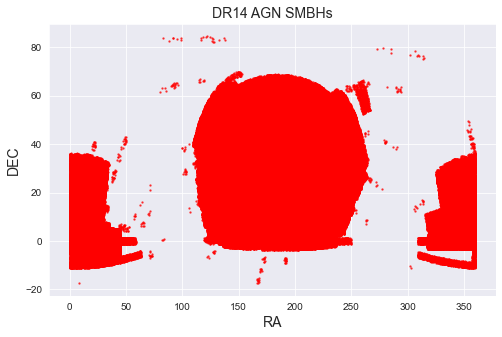

In [10]:
sns.set_style('darkgrid')
plt.figure(figsize = [8,5])
plt.title('DR14 AGN SMBHs',fontsize=14)
plt.xlabel('RA',fontsize=14)
plt.ylabel('DEC',fontsize=14)
plt.scatter(clean_df['ra'], clean_df['dec'], color = 'red', s=2, alpha=.6)

Now we'd like to know how our masses and errors are distributed.

/Users/SnehPandya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


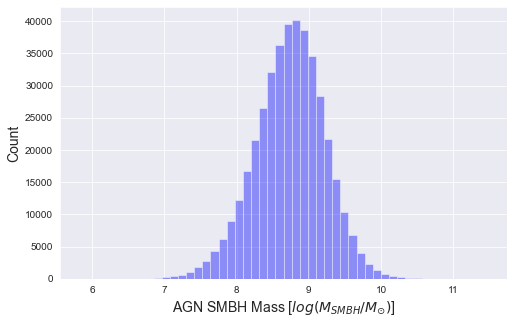

In [11]:
plt.figure(figsize=(8, 5))
sns.distplot(clean_df['Mass'], kde=False, color='blue')
# plt.title('Ground Truth Mass Distribution',  fontsize=14)
# plt.xlim(0,.3)
plt.xlabel('AGN SMBH Mass [$log(M_{SMBH}/M_{\odot})$]',  fontsize=14)
plt.ylabel('Count',  fontsize=14)
plt.savefig('/Users/SnehPandya/Desktop/mass_hist.pdf', bbox_inches = 'tight',
    pad_inches = 0)

Let's also see how what our ground truth redshift distribution is.

/Users/SnehPandya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


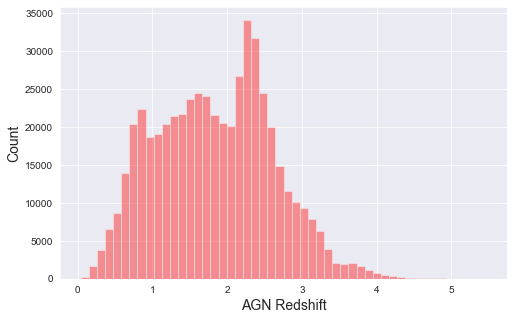

In [12]:
plt.figure(figsize=(8, 5))
sns.distplot(df['z'], kde=False, color='red')
# plt.title('Ground Truth Mass Distribution',  fontsize=14)
# plt.xlim(0,.3)
plt.xlabel('AGN Redshift',  fontsize=14)
plt.ylabel('Count',  fontsize=14)
plt.savefig('/Users/SnehPandya/Desktop/z_hist.pdf', bbox_inches = 'tight',
    pad_inches = 0)

/Users/SnehPandya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

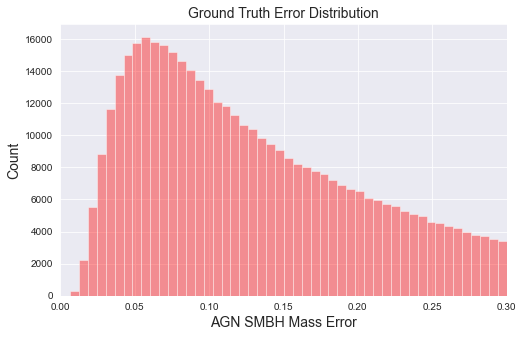

In [13]:
plt.figure(figsize=(8, 5))
sns.distplot(clean_df['ERR'], kde=False, color='red')
plt.title('Ground Truth Error Distribution',  fontsize=14)
plt.xlim(0,.3)
plt.xlabel('AGN SMBH Mass Error',  fontsize=14)
plt.ylabel('Count',  fontsize=14)

Now for our mass distribution as a function of redshift. The apparent break at z~2 is an artifict of survey design.

Text(0.5, 1.0, 'DR14 AGN')

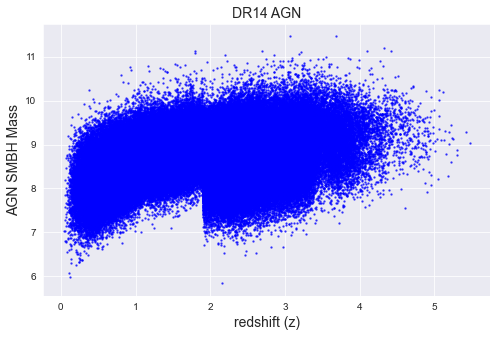

In [14]:
plt.figure(figsize=(8, 5))
plt.scatter(clean_df['z'],clean_df['Mass'], s=2, color = 'blue', alpha=.6)
plt.xlabel('redshift (z)', fontsize= 14)
plt.ylabel('AGN SMBH Mass', fontsize=14)
plt.title('DR14 AGN', fontsize=14)

This process can be repeated with the DR7 .fits file from (http://quasar.astro.illinois.edu/BH_mass/dr7.htm)

In [54]:
# output csv
# clean_df.to_csv('../../data/dr14_BH.csv')

/Users/SnehPandya/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


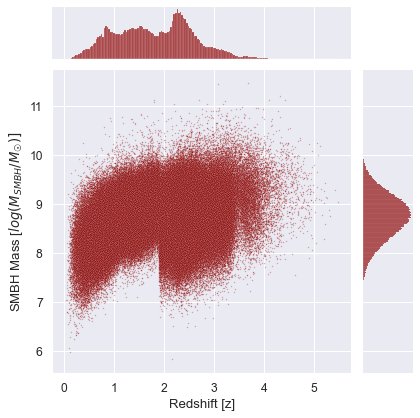

In [46]:
sns.set(font_scale=1.1)
fig = sns.jointplot(clean_df['z'],clean_df['Mass'],s=2,alpha=.3, color='darkred')
fig.set_axis_labels('Redshift [z]', "SMBH Mass [$log(M_{SMBH}/M_{☉})]$")
fig.savefig('/Users/SnehPandya/Desktop/cleandfplot.png', dpi=300)

/Users/SnehPandya/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


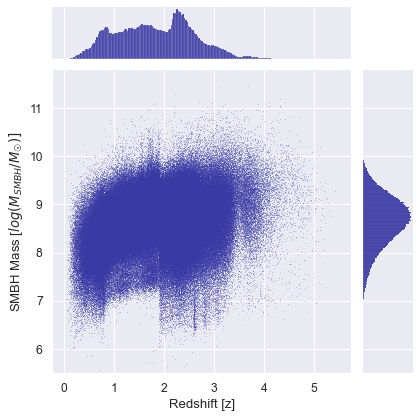

In [47]:
sns.set(font_scale=1.1)
fig = sns.jointplot(df['z'],df['Mass'],s=1,alpha=.3, color='darkblue')
fig.set_axis_labels('Redshift [z]', "SMBH Mass [$log(M_{SMBH}/M_{☉})]$")
fig.ax_marg_y.set_ylim(5.5, 11.8)
fig.savefig('/Users/SnehPandya/Desktop/dfplot.png', dpi=300)